# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

In [7]:
#creating categorical dummy variables as intergers for sex, smoker, time, and day
tips['sex_code'] = tips.sex.cat.codes
#male=0, female=1
tips['smoker_code'] = tips.smoker.cat.codes
#smoker=0, non-smoker=1
tips['day_code'] = tips.day.cat.codes
#Thurs=0, Friday=1, Sat=2, Sun=3
tips['time_code'] = tips.time.cat.codes
#lunch=0, dinner=1
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_code,smoker_code,day_code,time_code
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,3,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,3,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,3,1


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
total_bill     244 non-null float64
tip            244 non-null float64
sex            244 non-null category
smoker         244 non-null category
day            244 non-null category
time           244 non-null category
size           244 non-null int64
sex_code       244 non-null int8
smoker_code    244 non-null int8
day_code       244 non-null int8
time_code      244 non-null int8
dtypes: category(4), float64(2), int64(1), int8(4)
memory usage: 8.2 KB


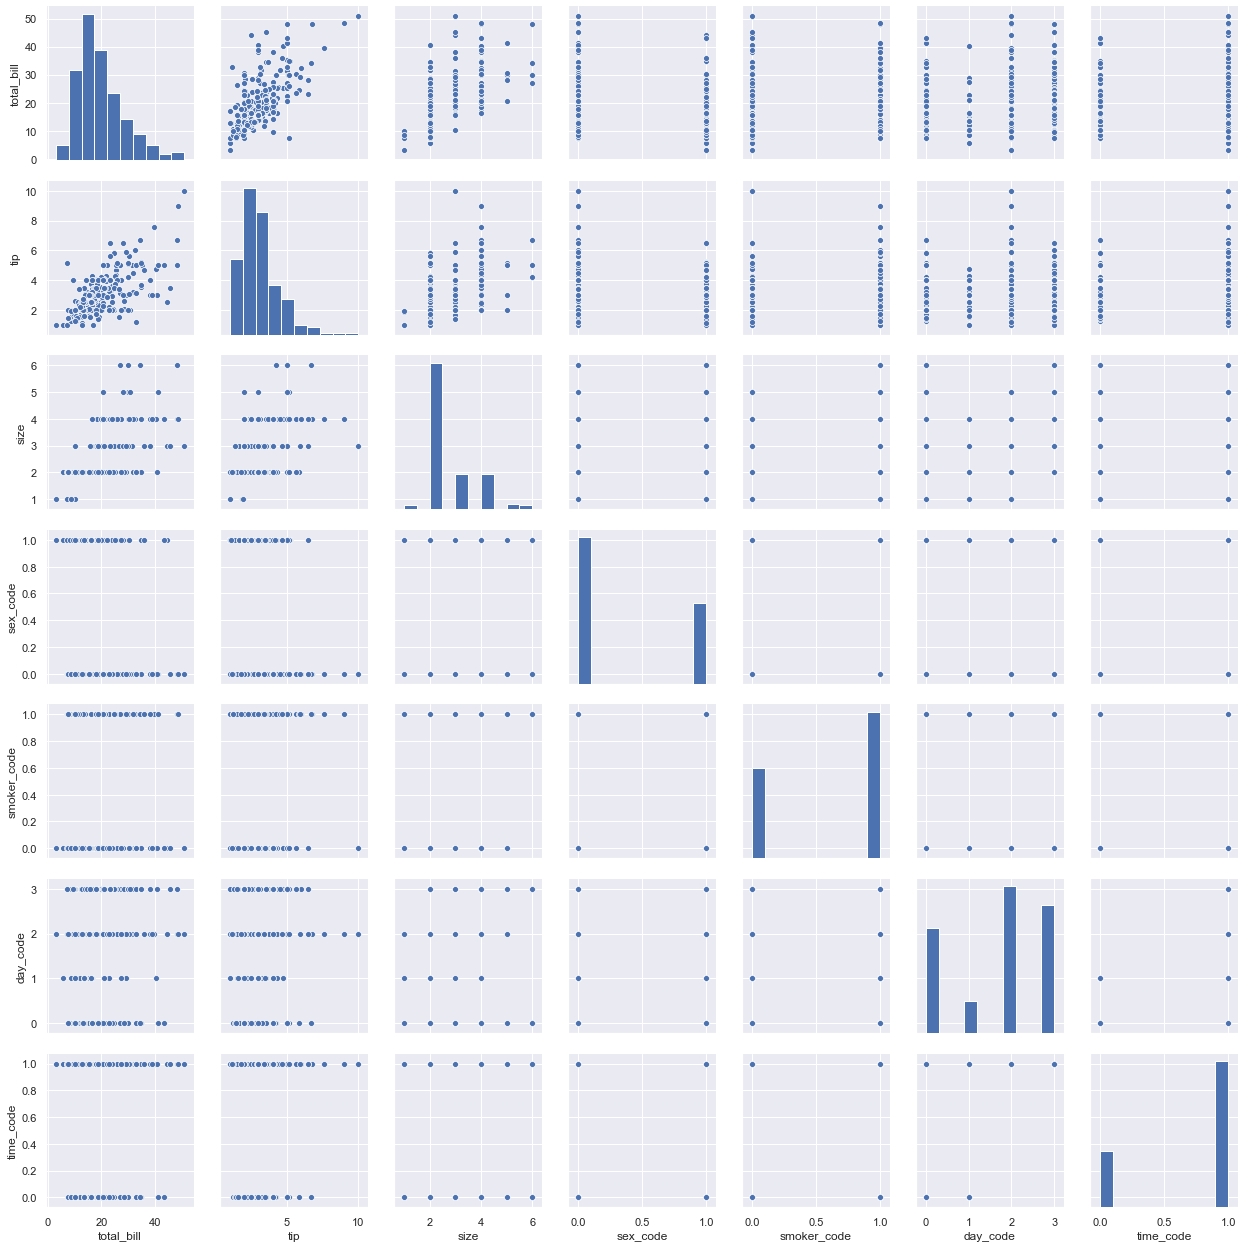

In [5]:
#scatterplot matrix to pick useful variables
sns.pairplot(tips)
plt.show()

In [11]:
#create linear regression model to predict impact of total bill and sex on tips
x = sm.add_constant(tips[['total_bill', 'sex_code']])
y = tips.tip

lm = sm.OLS(y, x).fit()

# Residual Sum of Squares
RSS = sum(lm.resid ** 2)

# Total Sum of Squares
TSS = sum((tips.tip - np.mean(tips.tip)) ** 2)
R2 = 1 - (RSS/TSS)

#print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           1.18e-32
Time:                        10:49:33   Log-Likelihood:                -350.52
No. Observations:                 244   AIC:                             707.0
Df Residuals:                     241   BIC:                             717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9067      0.175      5.182      0.000       0.562       1.251
total_bill     0.1052      0.007     14.110      0.000       0.091       0.120
sex_code       0.0266      0.138      0.192      0.848      -0.246       0.299
==============================================================================
Omnibus:                       20.499   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.652
Skew:                           0.447   Prob(JB):                     4.05e-09
Kurtosis:                       4.733   Cond. No.                         63.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide a linear function like this one from the class notes:  
    Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User

Linear function:

### **Tip(Total Bill, Sex)=0.9067+0.1052Total Bill+0.0266Sex**

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

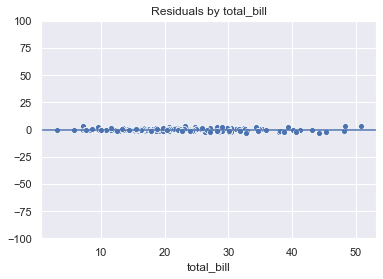

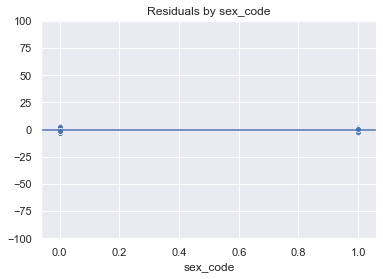

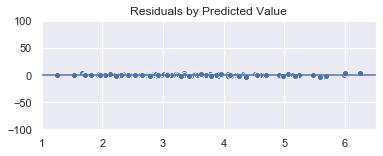

1.8891991796080534e-15


(array([ 2.,  8., 13., 53., 90., 44., 20.,  8.,  3.,  3.]),
 array([-3.19144806, -2.49765583, -1.80386361, -1.11007139, -0.41627917,
         0.27751306,  0.97130528,  1.6650975 ,  2.35888972,  3.05268194,
         3.74647417]),
 <a list of 10 Patch objects>)

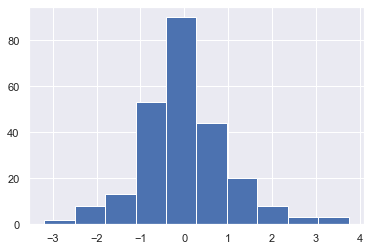

In [12]:
for x in ('total_bill', 'sex_code'):
    plt.figure(figsize=(6,4))
    sns.scatterplot(tips[x], lm.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(lm.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lm.predict(), lm.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(lm.resid))
plt.show()

print(np.mean(lm.resid))
plt.hist(lm.resid)

In [16]:
print(lm.pvalues)
print("R-squared: %2.2f%%" % (lm.rsquared*100))
print("Adjusted R-squared: %2.2f%%" % (lm.rsquared_adj * 100))

const         4.647500e-07
total_bill    2.332173e-33
sex_code      8.476290e-01
dtype: float64
R-squared: 45.67%
Adjusted R-squared: 45.22%


Total bill is highly significant (p-value less than 0.05) and is a good predictor for tip. Sex is not significant (p-value much greater than 0.05) and does not predict tip very well.
This linear model of total bill and sex explains about 45% of the data.

4) Does your model meet the four assumptions expected of a linear model? Explain:

The model meets the four assumptions because:

1) both the total bill and sex have a mean close to zero across the data (see residuals graphs by total bill/sex graphs)

2) has constant variance (see residuals graphs by total bill/sex graphs)

3) is noramlly distributed (see histogram)

4) are independent of one another - no correlation